## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1          X2        X3        X4         Y
0  98.964531  561.938545  0.985549  5.768395  1.459989
1  34.234911  375.164428  0.842525  2.758248  1.349659
2  37.570860  206.171221  0.941915  2.595454  1.377573
3  32.208283  404.257599  0.798856  9.339272  1.500062
4  55.697772  387.958254  0.169125  3.038747  0.789158


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9892041	total: 57.2ms	remaining: 57.2s
1:	learn: 0.9795006	total: 57.7ms	remaining: 28.8s
2:	learn: 0.9678097	total: 58.2ms	remaining: 19.3s
3:	learn: 0.9569768	total: 58.6ms	remaining: 14.6s
4:	learn: 0.9461980	total: 59.1ms	remaining: 11.8s
5:	learn: 0.9357364	total: 59.6ms	remaining: 9.87s
6:	learn: 0.9243278	total: 60.1ms	remaining: 8.53s
7:	learn: 0.9128252	total: 60.6ms	remaining: 7.52s
8:	learn: 0.9044333	total: 61.1ms	remaining: 6.73s
9:	learn: 0.8937797	total: 61.6ms	remaining: 6.1s
10:	learn: 0.8836381	total: 62.1ms	remaining: 5.58s
11:	learn: 0.8743091	total: 62.5ms	remaining: 5.15s
12:	learn: 0.8646287	total: 63ms	remaining: 4.78s
13:	learn: 0.8568961	total: 63.5ms	remaining: 4.47s
14:	learn: 0.8473245	total: 63.9ms	remaining: 4.19s
15:	learn: 0.8390103	total: 64.2ms	remaining: 3.95s
16:	learn: 0.8283908	total: 64.7ms	remaining: 3.74s
17:	learn: 0.8202639	total: 65.1ms	remaining: 3.55s
18:	learn: 0.8128731	total: 65.6ms	remaining: 3

145:	learn: 0.3145801	total: 119ms	remaining: 693ms
146:	learn: 0.3128249	total: 119ms	remaining: 691ms
147:	learn: 0.3109176	total: 120ms	remaining: 688ms
148:	learn: 0.3088944	total: 120ms	remaining: 685ms
149:	learn: 0.3076708	total: 120ms	remaining: 682ms
150:	learn: 0.3063335	total: 121ms	remaining: 679ms
151:	learn: 0.3046848	total: 121ms	remaining: 676ms
152:	learn: 0.3032839	total: 122ms	remaining: 673ms
153:	learn: 0.3016455	total: 122ms	remaining: 670ms
154:	learn: 0.3001022	total: 122ms	remaining: 668ms
155:	learn: 0.2986272	total: 123ms	remaining: 664ms
156:	learn: 0.2978238	total: 123ms	remaining: 661ms
157:	learn: 0.2964281	total: 124ms	remaining: 659ms
158:	learn: 0.2949316	total: 124ms	remaining: 657ms
159:	learn: 0.2937738	total: 125ms	remaining: 654ms
160:	learn: 0.2924459	total: 125ms	remaining: 652ms
161:	learn: 0.2911705	total: 126ms	remaining: 650ms
162:	learn: 0.2898819	total: 126ms	remaining: 648ms
163:	learn: 0.2884719	total: 127ms	remaining: 646ms
164:	learn: 

300:	learn: 0.1881320	total: 186ms	remaining: 431ms
301:	learn: 0.1875079	total: 186ms	remaining: 430ms
302:	learn: 0.1872091	total: 187ms	remaining: 429ms
303:	learn: 0.1866677	total: 187ms	remaining: 428ms
304:	learn: 0.1864130	total: 188ms	remaining: 427ms
305:	learn: 0.1856376	total: 188ms	remaining: 426ms
306:	learn: 0.1854158	total: 188ms	remaining: 425ms
307:	learn: 0.1844747	total: 189ms	remaining: 424ms
308:	learn: 0.1842371	total: 189ms	remaining: 423ms
309:	learn: 0.1840421	total: 190ms	remaining: 422ms
310:	learn: 0.1835122	total: 190ms	remaining: 421ms
311:	learn: 0.1825950	total: 190ms	remaining: 420ms
312:	learn: 0.1823472	total: 191ms	remaining: 418ms
313:	learn: 0.1817050	total: 191ms	remaining: 417ms
314:	learn: 0.1810764	total: 191ms	remaining: 416ms
315:	learn: 0.1804610	total: 192ms	remaining: 415ms
316:	learn: 0.1802240	total: 192ms	remaining: 414ms
317:	learn: 0.1796232	total: 193ms	remaining: 413ms
318:	learn: 0.1792121	total: 193ms	remaining: 412ms
319:	learn: 

566:	learn: 0.0856880	total: 300ms	remaining: 229ms
567:	learn: 0.0853733	total: 301ms	remaining: 229ms
568:	learn: 0.0851637	total: 301ms	remaining: 228ms
569:	learn: 0.0849586	total: 302ms	remaining: 227ms
570:	learn: 0.0846513	total: 302ms	remaining: 227ms
571:	learn: 0.0843984	total: 302ms	remaining: 226ms
572:	learn: 0.0840974	total: 303ms	remaining: 226ms
573:	learn: 0.0838582	total: 303ms	remaining: 225ms
574:	learn: 0.0835633	total: 303ms	remaining: 224ms
575:	learn: 0.0833392	total: 304ms	remaining: 224ms
576:	learn: 0.0831658	total: 304ms	remaining: 223ms
577:	learn: 0.0829643	total: 305ms	remaining: 223ms
578:	learn: 0.0826765	total: 305ms	remaining: 222ms
579:	learn: 0.0824582	total: 306ms	remaining: 221ms
580:	learn: 0.0821412	total: 306ms	remaining: 221ms
581:	learn: 0.0818830	total: 307ms	remaining: 220ms
582:	learn: 0.0816686	total: 307ms	remaining: 220ms
583:	learn: 0.0814788	total: 307ms	remaining: 219ms
584:	learn: 0.0812687	total: 308ms	remaining: 218ms
585:	learn: 

718:	learn: 0.0572116	total: 367ms	remaining: 144ms
719:	learn: 0.0570796	total: 368ms	remaining: 143ms
720:	learn: 0.0569501	total: 368ms	remaining: 142ms
721:	learn: 0.0568226	total: 369ms	remaining: 142ms
722:	learn: 0.0567428	total: 369ms	remaining: 141ms
723:	learn: 0.0566645	total: 369ms	remaining: 141ms
724:	learn: 0.0564584	total: 370ms	remaining: 140ms
725:	learn: 0.0563812	total: 370ms	remaining: 140ms
726:	learn: 0.0562272	total: 371ms	remaining: 139ms
727:	learn: 0.0560244	total: 371ms	remaining: 139ms
728:	learn: 0.0558964	total: 371ms	remaining: 138ms
729:	learn: 0.0558202	total: 372ms	remaining: 137ms
730:	learn: 0.0556950	total: 372ms	remaining: 137ms
731:	learn: 0.0555592	total: 373ms	remaining: 136ms
732:	learn: 0.0554255	total: 373ms	remaining: 136ms
733:	learn: 0.0553564	total: 373ms	remaining: 135ms
734:	learn: 0.0551207	total: 374ms	remaining: 135ms
735:	learn: 0.0549821	total: 374ms	remaining: 134ms
736:	learn: 0.0548176	total: 375ms	remaining: 134ms
737:	learn: 

985:	learn: 0.0303146	total: 483ms	remaining: 6.85ms
986:	learn: 0.0301989	total: 483ms	remaining: 6.36ms
987:	learn: 0.0300858	total: 483ms	remaining: 5.87ms
988:	learn: 0.0300650	total: 484ms	remaining: 5.38ms
989:	learn: 0.0299651	total: 484ms	remaining: 4.89ms
990:	learn: 0.0298816	total: 485ms	remaining: 4.4ms
991:	learn: 0.0297865	total: 485ms	remaining: 3.91ms
992:	learn: 0.0296898	total: 486ms	remaining: 3.42ms
993:	learn: 0.0295950	total: 486ms	remaining: 2.93ms
994:	learn: 0.0295129	total: 487ms	remaining: 2.44ms
995:	learn: 0.0294045	total: 487ms	remaining: 1.96ms
996:	learn: 0.0293122	total: 487ms	remaining: 1.47ms
997:	learn: 0.0292249	total: 488ms	remaining: 977us
998:	learn: 0.0291299	total: 488ms	remaining: 488us
999:	learn: 0.0290491	total: 488ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


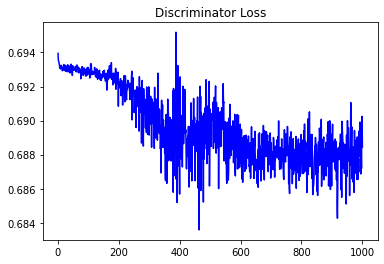

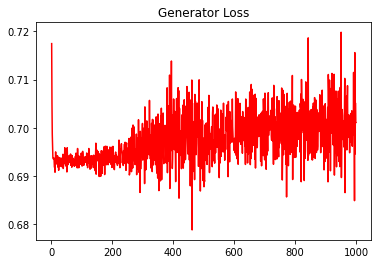

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.7446247262466614


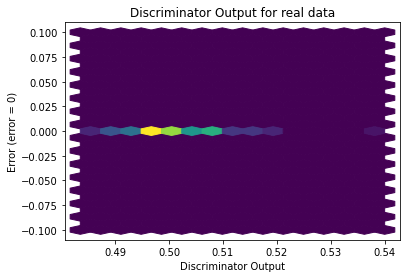

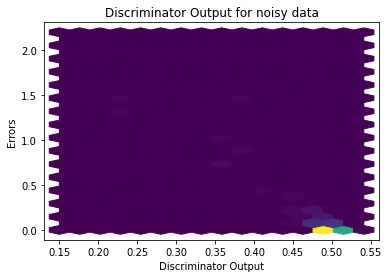

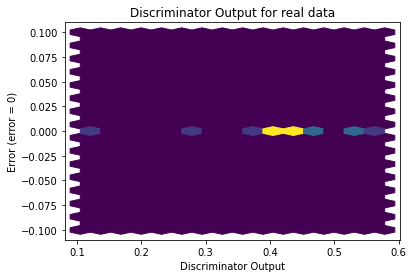

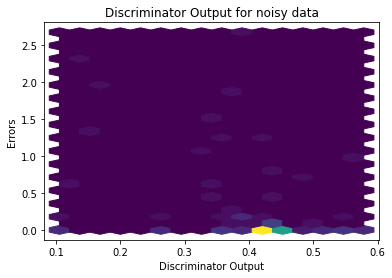

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1450]], requires_grad=True)
